## EXERCICE 4

SIGNAL ANALYSIS
x(t) = 1 + cos(2π·2000t) + 2cos(2π·4000t) + 3cos(2π·6000t)

Sampling frequency fs = 8000 Hz
Nyquist frequency = 4000.0 Hz

Frequency Analysis:
  f1 = 2000 Hz  < Nyquist ✓
  f2 = 4000 Hz  = Nyquist ✓
  f3 = 6000 Hz  > Nyquist ✗ ALIASING!
  f3 aliases to: fs - f3 = 8000 - 6000 = 2000 Hz


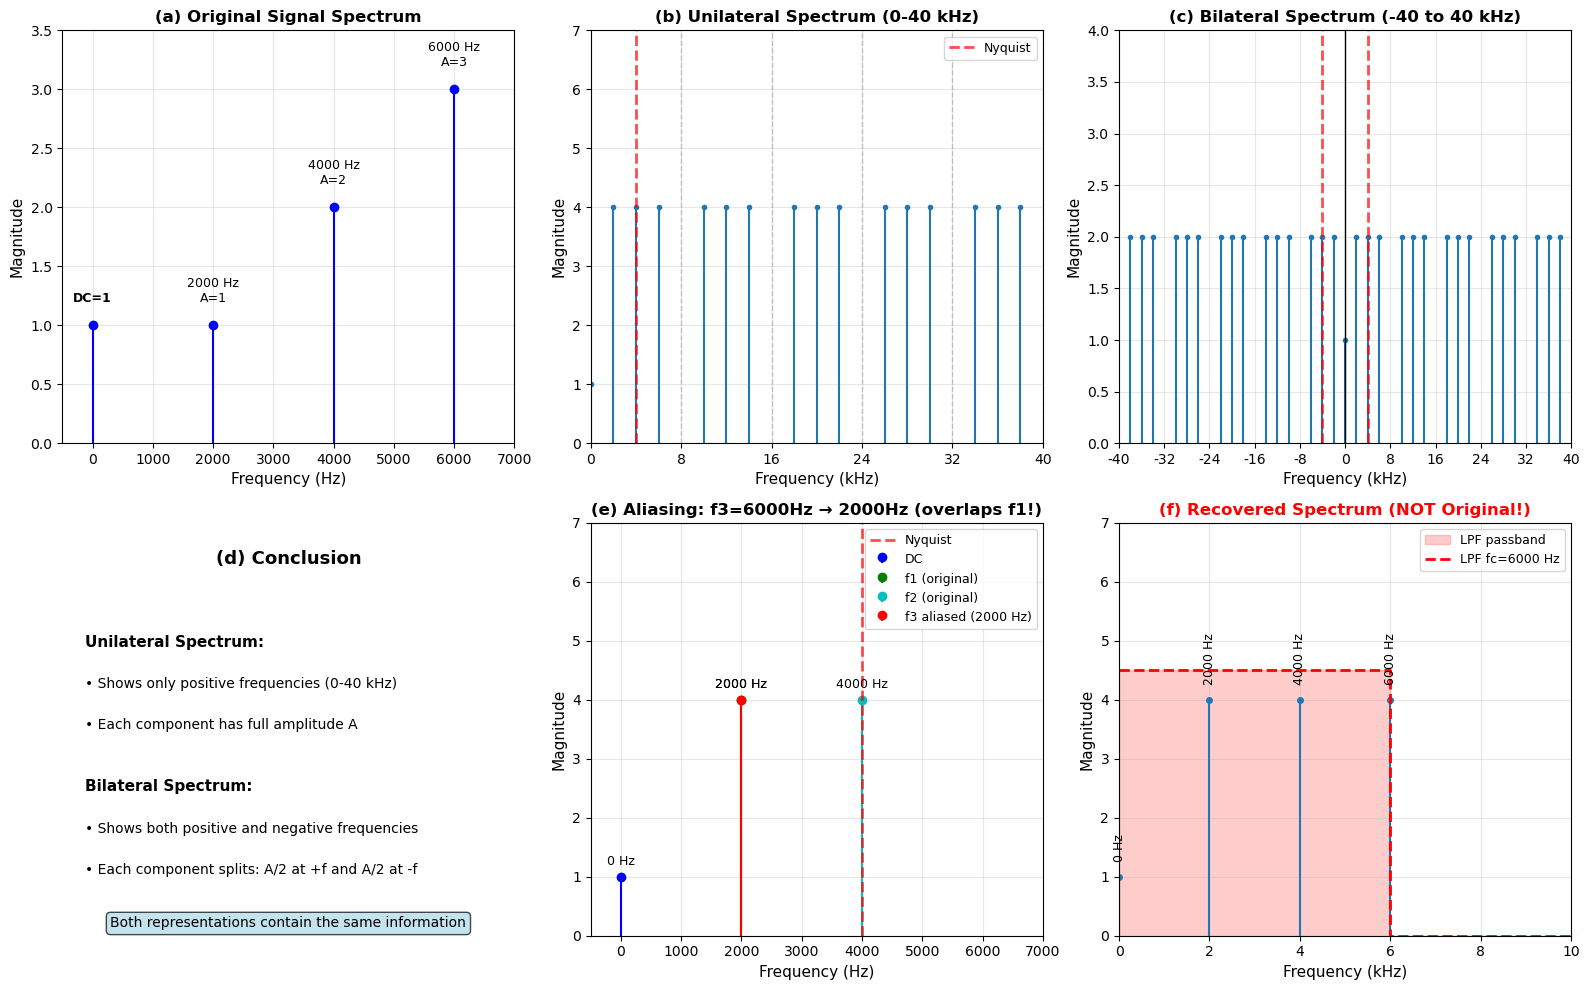

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
DC = 1         # DC component
f1 = 2000      # First frequency (Hz)
f2 = 4000      # Second frequency (Hz)
f3 = 6000      # Third frequency (Hz)
A1 = 1         # Amplitude of first cosine
A2 = 2         # Amplitude of second cosine
A3 = 3         # Amplitude of third cosine
fs = 8000      # Sampling frequency (Hz)
fc = 6000      # Cutoff frequency for LPF (Hz)

print("="*80)
print("SIGNAL ANALYSIS")
print("="*80)
print(f"x(t) = 1 + cos(2π·2000t) + 2cos(2π·4000t) + 3cos(2π·6000t)")
print(f"\nSampling frequency fs = {fs} Hz")
print(f"Nyquist frequency = {fs/2} Hz")
print(f"\nFrequency Analysis:")
print(f"  f1 = {f1} Hz  < Nyquist ✓")
print(f"  f2 = {f2} Hz  = Nyquist ✓")
print(f"  f3 = {f3} Hz  > Nyquist ✗ ALIASING!")
print(f"  f3 aliases to: fs - f3 = {fs} - {f3} = {fs-f3} Hz")

# Create figure with subplots
fig = plt.figure(figsize=(16, 10))

# ============================================================================
# (a) Spectrum of Original Signal
# ============================================================================
ax1 = plt.subplot(2, 3, 1)
original_freqs = [0, f1, f2, f3]
original_mags = [DC, A1, A2, A3]

ax1.stem(original_freqs, original_mags, basefmt=' ', linefmt='b-', markerfmt='bo')
ax1.set_xlabel('Frequency (Hz)', fontsize=11)
ax1.set_ylabel('Magnitude', fontsize=11)
ax1.set_title('(a) Original Signal Spectrum', fontsize=12, fontweight='bold')
ax1.set_xlim([-500, 7000])
ax1.set_ylim([0, 3.5])
ax1.grid(True, alpha=0.3)

# Annotate frequencies
for f, m in zip(original_freqs, original_mags):
    if f == 0:
        ax1.text(f, m + 0.2, f'DC={m}', ha='center', fontsize=9, fontweight='bold')
    else:
        ax1.text(f, m + 0.2, f'{int(f)} Hz\nA={m}', ha='center', fontsize=9)

# ============================================================================
# (b) Unilateral Spectrum of Sampled Signal (0 to 40 kHz)
# ============================================================================
ax2 = plt.subplot(2, 3, 2)

# Calculate spectral replicas for unilateral representation
unilateral_freqs = []
unilateral_mags = []

# DC component
unilateral_freqs.append(0)
unilateral_mags.append(DC)

# Create a dictionary to accumulate magnitudes at each frequency
uni_freq_dict = {}

# For each cosine component, add replicas
for f_orig, A_orig in [(f1, A1), (f2, A2), (f3, A3)]:
    for k in range(6):  # k = 0, 1, 2, 3, 4, 5
        # Positive replica: k*fs + f_orig
        freq_pos = k * fs + f_orig
        if 0 < freq_pos <= 40000:
            if freq_pos not in uni_freq_dict:
                uni_freq_dict[freq_pos] = 0
            uni_freq_dict[freq_pos] += A_orig
        
        # Negative replica: k*fs - f_orig
        freq_neg = k * fs - f_orig
        if 0 < freq_neg <= 40000:
            if freq_neg not in uni_freq_dict:
                uni_freq_dict[freq_neg] = 0
            uni_freq_dict[freq_neg] += A_orig

# Convert dictionary to lists
for freq in sorted(uni_freq_dict.keys()):
    unilateral_freqs.append(freq)
    unilateral_mags.append(uni_freq_dict[freq])

markerline, stemlines, baseline = ax2.stem(unilateral_freqs, unilateral_mags, basefmt=' ')
plt.setp(markerline, markersize=3)
ax2.set_xlabel('Frequency (kHz)', fontsize=11)
ax2.set_ylabel('Magnitude', fontsize=11)
ax2.set_title('(b) Unilateral Spectrum (0-40 kHz)', fontsize=12, fontweight='bold')
ax2.set_xlim([0, 40000])
ax2.set_ylim([0, 7])
ax2.set_xticks(np.arange(0, 41000, 8000))
ax2.set_xticklabels(np.arange(0, 41, 8))
ax2.grid(True, alpha=0.3)

# Mark multiples of fs
for k in range(1, 6):
    ax2.axvline(x=k*fs, color='gray', linestyle='--', alpha=0.4, linewidth=1)

# Mark Nyquist frequency
ax2.axvline(x=fs/2, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Nyquist')
ax2.legend(fontsize=9)

# ============================================================================
# (c) Bilateral Spectrum of Sampled Signal (-40 to 40 kHz)
# ============================================================================
ax3 = plt.subplot(2, 3, 3)

# Calculate spectral replicas for bilateral representation
bilateral_freqs = []
bilateral_mags = []

# DC component
bilateral_freqs.append(0)
bilateral_mags.append(DC)

# Create a dictionary to accumulate magnitudes at each frequency
freq_dict = {}

# For each cosine component, add replicas at positive and negative frequencies
for f_orig, A_orig in [(f1, A1), (f2, A2), (f3, A3)]:
    for k in range(-5, 6):  # k = -5 to 5
        # Positive frequency replica: k*fs + f_orig
        freq_pos = k * fs + f_orig
        if -40000 <= freq_pos <= 40000 and freq_pos != 0:
            if freq_pos not in freq_dict:
                freq_dict[freq_pos] = 0
            freq_dict[freq_pos] += A_orig / 2
        
        # Negative frequency replica: k*fs - f_orig
        freq_neg = k * fs - f_orig
        if -40000 <= freq_neg <= 40000 and freq_neg != 0:
            if freq_neg not in freq_dict:
                freq_dict[freq_neg] = 0
            freq_dict[freq_neg] += A_orig / 2

# Convert dictionary to lists
for freq in sorted(freq_dict.keys()):
    bilateral_freqs.append(freq)
    bilateral_mags.append(freq_dict[freq])

markerline, stemlines, baseline = ax3.stem(bilateral_freqs, bilateral_mags, basefmt=' ')
plt.setp(markerline, markersize=3)
ax3.set_xlabel('Frequency (kHz)', fontsize=11)
ax3.set_ylabel('Magnitude', fontsize=11)
ax3.set_title('(c) Bilateral Spectrum (-40 to 40 kHz)', fontsize=12, fontweight='bold')
ax3.set_xlim([-40000, 40000])
ax3.set_ylim([0, 4])
ax3.set_xticks(np.arange(-40000, 41000, 8000))
ax3.set_xticklabels(np.arange(-40, 41, 8))
ax3.grid(True, alpha=0.3)
ax3.axvline(x=0, color='k', linewidth=1)

# Mark Nyquist frequencies
ax3.axvline(x=fs/2, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax3.axvline(x=-fs/2, color='red', linestyle='--', alpha=0.7, linewidth=2)

# ============================================================================
# (d) Conclusion about (b) and (c)
# ============================================================================
ax4 = plt.subplot(2, 3, 4)
ax4.axis('off')
ax4.text(0.5, 0.9, '(d) Conclusion', ha='center', fontsize=13, fontweight='bold', transform=ax4.transAxes)
ax4.text(0.05, 0.7, 'Unilateral Spectrum:', fontsize=11, fontweight='bold', transform=ax4.transAxes)
ax4.text(0.05, 0.6, '• Shows only positive frequencies (0-40 kHz)', fontsize=10, transform=ax4.transAxes)
ax4.text(0.05, 0.5, '• Each component has full amplitude A', fontsize=10, transform=ax4.transAxes)
ax4.text(0.05, 0.35, 'Bilateral Spectrum:', fontsize=11, fontweight='bold', transform=ax4.transAxes)
ax4.text(0.05, 0.25, '• Shows both positive and negative frequencies', fontsize=10, transform=ax4.transAxes)
ax4.text(0.05, 0.15, '• Each component splits: A/2 at +f and A/2 at -f', fontsize=10, transform=ax4.transAxes)
ax4.text(0.5, 0.02, 'Both representations contain the same information', ha='center', fontsize=10, 
         transform=ax4.transAxes, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# ============================================================================
# (e) Aliasing Frequencies
# ============================================================================
ax5 = plt.subplot(2, 3, 5)

# Show first Nyquist zone with aliasing
aliased_freqs = [0, f1, f2, fs-f3]
aliased_mags = [DC, A1+A3, A2+A2, A3+A1]

# Plot components with color coding
ax5.stem([0], [DC], basefmt=' ', linefmt='b-', markerfmt='bo', label='DC')
ax5.stem([f1], [A1+A3], basefmt=' ', linefmt='g-', markerfmt='go', label='f1 (original)')
ax5.stem([f2], [A2+A2], basefmt=' ', linefmt='c-', markerfmt='co', label='f2 (original)')
ax5.stem([fs-f3], [A3+A1], basefmt=' ', linefmt='r-', markerfmt='ro', label=f'f3 aliased ({fs-f3} Hz)')

ax5.set_xlabel('Frequency (Hz)', fontsize=11)
ax5.set_ylabel('Magnitude', fontsize=11)
ax5.set_title(f'(e) Aliasing: f3={f3}Hz → {fs-f3}Hz (overlaps f1!)', fontsize=12, fontweight='bold')
ax5.set_xlim([-500, 7000])
ax5.set_ylim([0, 7])
ax5.grid(True, alpha=0.3)
ax5.axvline(x=fs/2, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Nyquist')

# Annotate
for f, m in zip(aliased_freqs, aliased_mags):
    ax5.text(f, m + 0.2, f'{int(f)} Hz', ha='center', fontsize=9)

ax5.legend(fontsize=9, loc='upper right')

# ============================================================================
# (f) Recovered Signal with LPF at 6 kHz
# ============================================================================
ax6 = plt.subplot(2, 3, 6)

# Filter the unilateral spectrum
recovered_freqs = []
recovered_mags = []
for freq, mag in zip(unilateral_freqs, unilateral_mags):
    if freq <= fc:
        recovered_freqs.append(freq)
        recovered_mags.append(mag)

markerline, stemlines, baseline = ax6.stem(recovered_freqs, recovered_mags, basefmt=' ')
plt.setp(markerline, markersize=4)

# Draw ideal LPF response
lpf_freq = np.array([0, fc, fc, 40000])
lpf_response = np.array([1, 1, 0, 0])
ax6.fill_between(lpf_freq, 0, lpf_response * 4.5, color='red', alpha=0.2, label='LPF passband')
ax6.plot(lpf_freq, lpf_response * 4.5, 'r--', linewidth=2, label=f'LPF fc={fc} Hz')

ax6.set_xlabel('Frequency (kHz)', fontsize=11)
ax6.set_ylabel('Magnitude', fontsize=11)
ax6.set_title('(f) Recovered Spectrum (NOT Original!)', fontsize=12, fontweight='bold', color='red')
ax6.set_xlim([0, 10000])
ax6.set_ylim([0, 7])
ax6.set_xticks(np.arange(0, 10001, 2000))
ax6.set_xticklabels(np.arange(0, 11, 2))  # en kHz
ax6.grid(True, alpha=0.3)
ax6.legend(fontsize=9)

# Annotate main components
for f in [0, 2000, 4000, 6000]:
    if f in recovered_freqs:
        idx = recovered_freqs.index(f)
        ax6.text(f, recovered_mags[idx] + 0.3, f'{int(f)} Hz', ha='center', fontsize=9, rotation=90)

plt.tight_layout()
plt.show()